In [23]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
embed_classwise = {}
fea_path = "/home/vaibhav/Desktop/stud/datasets/esmart/features"

In [11]:
for im in os.listdir(fea_path):
    x = {}
    with open(os.path.join(fea_path,im), 'rb') as f:
        x = pickle.load(f)
    idx = 0
    for i in x['preds']['instances'].pred_classes:
        if embed_classwise.get(i.item()) == None:
            embed_classwise[i.item()] = [x['features'][idx].detach().cpu().numpy()]
        else:
            embed_classwise[i.item()].append(x['features'][idx].detach().cpu().numpy())
        idx += 1

In [13]:
with open('classwise_features.pkl', 'wb') as f:
        pickle.dump(embed_classwise, f)

In [5]:
with open('classwise_features.pkl', 'rb') as f:
        embed_classwise = pickle.load(f)

In [12]:
l = list(embed_classwise.keys())
l.sort()
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 18,
 19,
 20,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 30,
 31,
 32,
 33,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 45,
 46,
 47,
 51,
 53,
 56,
 58,
 60,
 61,
 62,
 63,
 66,
 67,
 69,
 71,
 72,
 73,
 74,
 75,
 77,
 79]

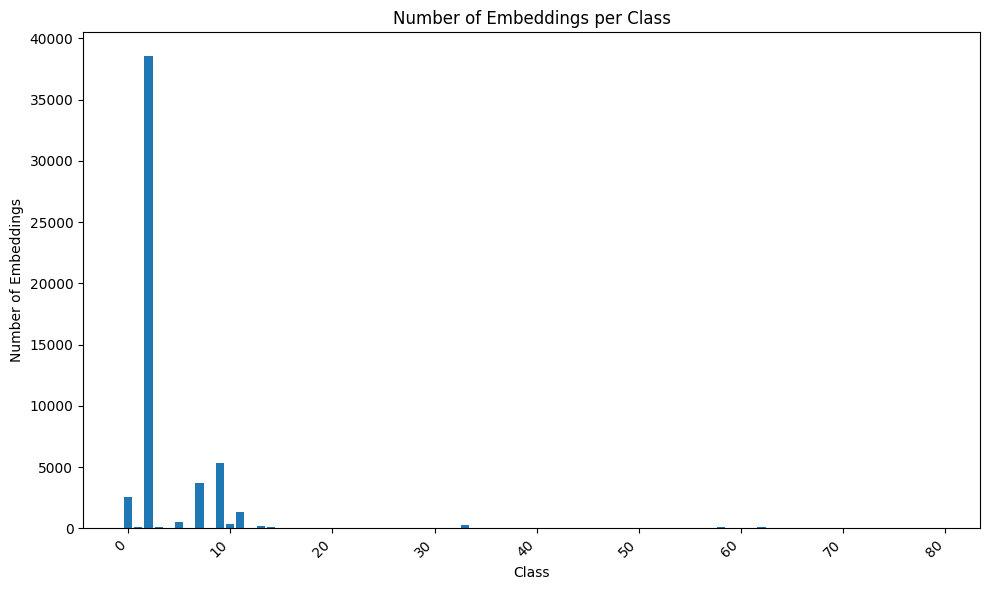

In [25]:
class_counts = {class_label: len(embeddings) for class_label, embeddings in embed_classwise.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Embeddings')
plt.title('Number of Embeddings per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
# just selecting the first 15 classes for viz
class_embeddings = {i:embed_classwise[i] for i in range(15)}

In [15]:
x['preds']['instances'].pred_classes[0].item()

2

In [32]:
x['features'].shape

torch.Size([6, 256, 7, 7])

In [22]:
[i for i in x['preds']['instances'].pred_classes]

[tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0'),
 tensor(2, device='cuda:0')]

In [8]:
# Extract embeddings and corresponding class labels
all_embeddings = []
class_labels = []
for class_label, embeddings in class_embeddings.items():
    all_embeddings.extend(embeddings)
    class_labels.extend([class_label] * len(embeddings))

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
class_labels = np.array(class_labels)
num_sample = class_labels.shape[0]
all_embeddings = all_embeddings.reshape(num_sample,-1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
pca_embeddings = pca.fit_transform(all_embeddings)

# Compute t-SNE embeddings on PCA embeddings
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

In [9]:
all_embeddings.shape,class_labels.shape

((53157, 12544), (53157,))

In [20]:
class_labels

array([ 2,  2,  2, ..., 38, 71, 71])

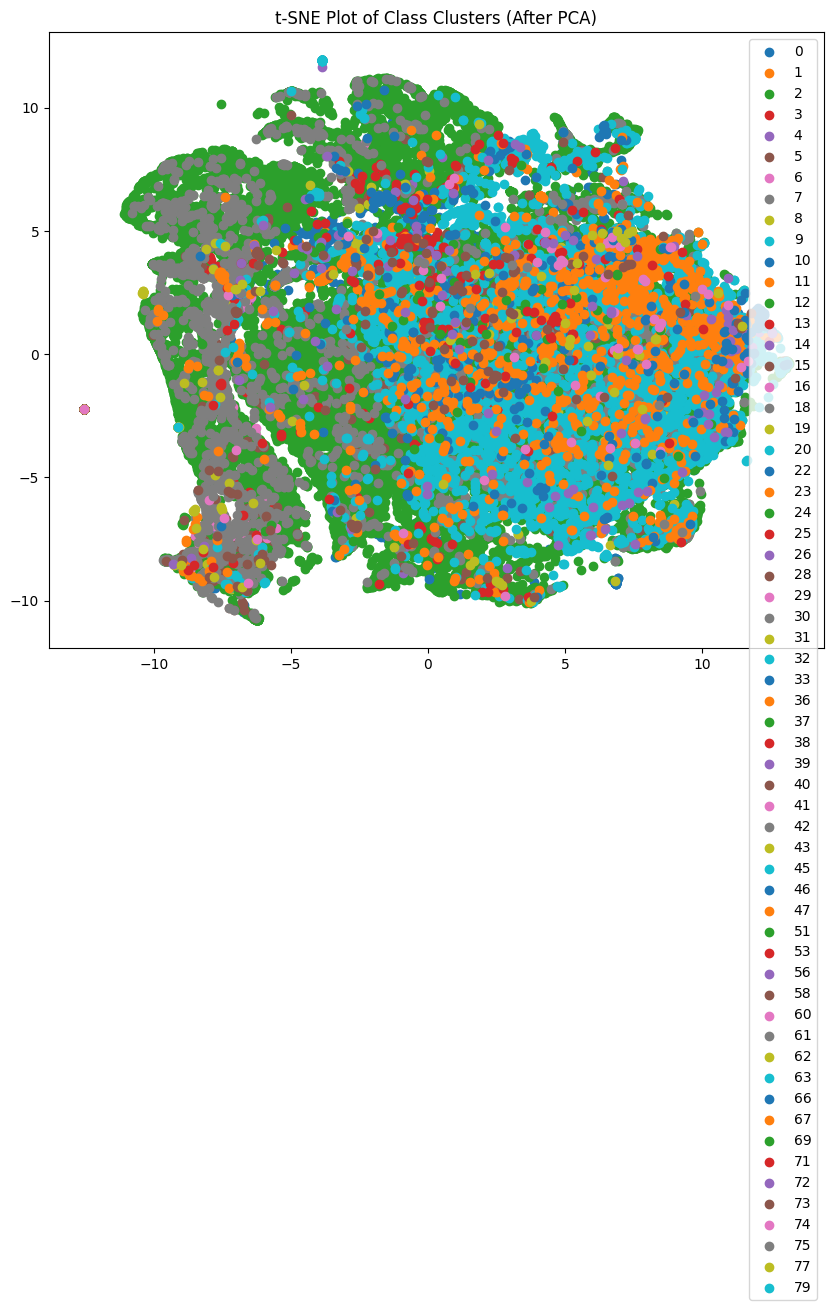

In [24]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend()
plt.show()

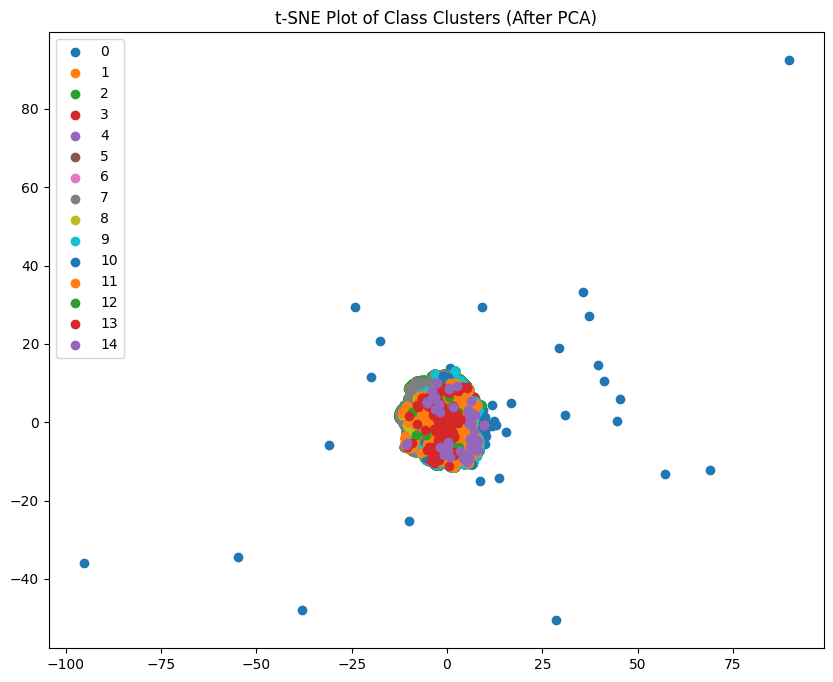

In [10]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend()
plt.show()

### COCO trained model with esmart GT boxes visualization

In [12]:
embed_classwise = {}
fea_path = "/home/vaibhav/Desktop/stud/datasets/esmart/GTfeatures"

In [18]:
for im in os.listdir(fea_path):
    x = {}
    with open(os.path.join(fea_path,im), 'rb') as f:
        x = pickle.load(f)
    idx = 0
    for i in x['preds']:
        if embed_classwise.get(i.item()) == None:
            embed_classwise[i.item()] = [x['features'][idx].detach().cpu().numpy()]
        else:
            embed_classwise[i.item()].append(x['features'][idx].detach().cpu().numpy())
        idx += 1

In [19]:
embed_classwise.keys()

dict_keys([8, 4, 2, 11, 10, 9, 7, 3, 5, 1, 6, 0])

In [20]:
with open('classwise_GTfeatures.pkl', 'wb') as f:
        pickle.dump(embed_classwise, f)

In [21]:
with open('classwise_GTfeatures.pkl', 'rb') as f:
        embed_classwise = pickle.load(f)

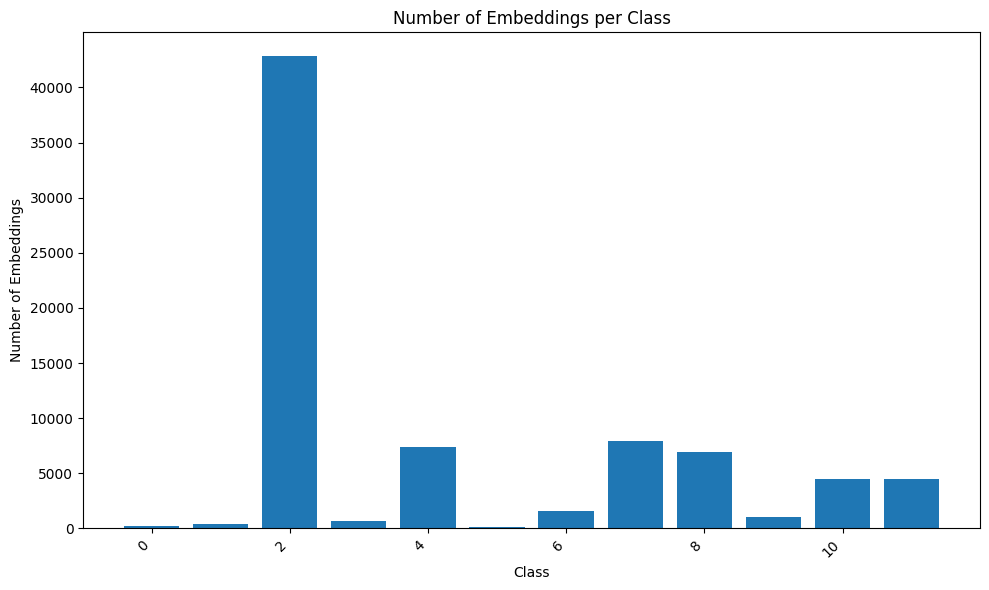

In [22]:
class_counts = {class_label: len(embeddings) for class_label, embeddings in embed_classwise.items()}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Embeddings')
plt.title('Number of Embeddings per Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# Extract embeddings and corresponding class labels
all_embeddings = []
class_labels = []
for class_label, embeddings in embed_classwise.items():
    all_embeddings.extend(embeddings)
    class_labels.extend([class_label] * len(embeddings))

# Convert to numpy arrays
all_embeddings = np.array(all_embeddings)
class_labels = np.array(class_labels)
num_sample = class_labels.shape[0]
all_embeddings = all_embeddings.reshape(num_sample,-1)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=50)  # Adjust the number of components as needed
pca_embeddings = pca.fit_transform(all_embeddings)

# Compute t-SNE embeddings on PCA embeddings
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_embeddings = tsne.fit_transform(pca_embeddings)

In [26]:
all_embeddings.shape,class_labels.shape

((78050, 12544), (78050,))

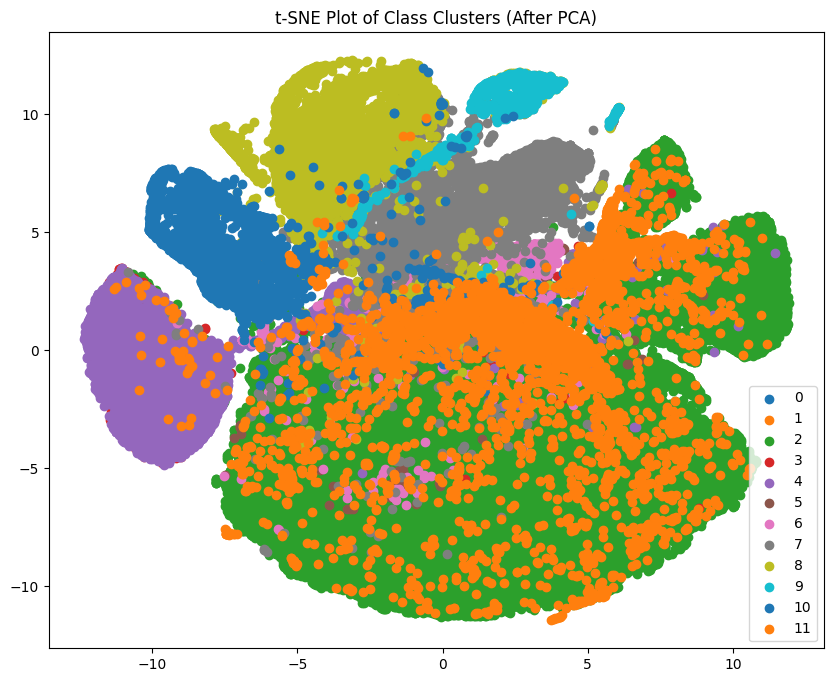

In [27]:
# Create a scatter plot
plt.figure(figsize=(10, 8))
unique_labels = np.unique(class_labels)
for label in unique_labels:
    indices = np.where(class_labels == label)
    plt.scatter(tsne_embeddings[indices, 0], tsne_embeddings[indices, 1], label=label)

plt.title('t-SNE Plot of Class Clusters (After PCA)')
plt.legend([
                        "bicycle","bus","car","lane","lanes","motorcycle","person",
                        "roadwork_tcd","speed_limit","stop sign", "traffic light",
                        "truck"
                          ])
plt.show()